# Linear Model Assumptions

Linear regression assumptions are:

- **Linearity**: The mean values of the outcome variable for each increment of the predictor(s) lie along a straight line. In other words, there is a linear relationship between predictors and target.

- **No perfect multicollinearity**: There should be no perfect linear relationship between two or more of the predictors. 

- **Normally distributed errors**: the residuals are random and normally distributed with a mean of 0.

- **Homoscedasticity**: At each level of the predictor variable(s), the variance of the residual terms should be constant.

Examples of linear models are:

- Linear and Logistic Regression

- Linear Discriminant Analysis (LDA)

**Failure to meet one or more of the model assumptions could end up in a poor model performance**.

If the assumptions are not met, we can:

- Use a different, non-linear model to predict the outcome from the variables.

- Transform the input variables so that they meet the assumptions.

## Performance of a linear model

To determine if a linear model fits the data well, we evaluate the residuals. The residuals should have a normal distribution with the mean centered at zero, and should be homoscedastic. If this is true, we can be fairly confident that the model is doing a good job.

The normal distribution can be assessed by Q-Q plots. Homoscedasticity can be assessed by residual plots.

We can also examine if there is a linear relationship between the predictors and the target with scatter-plots and residuals plots, and assess multi-colinearity with correlation matrices.

## When model assumptions are not met

Sometimes we can transform variables so that they meet the model assumptions. We normally do one of two things:

- Mathematical transformation of the variables

- Discretisation

In [1]:
import numpy as np
import pandas as pd

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# for the Q-Q plots
import scipy.stats as stats

# the dataset for the demo
from sklearn.datasets import fetch_california_housing

# for linear regression
from sklearn.linear_model import LinearRegression

# to split and standardize the dataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# to evaluate the regression model
from sklearn.metrics import mean_squared_error

In [2]:
# load the California House price data from Scikit-learn
X, Y = fetch_california_housing(return_X_y=True, as_frame=True)

# remove lat and lon
X.drop(["Latitude", "Longitude"], axis=1, inplace=True)
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467


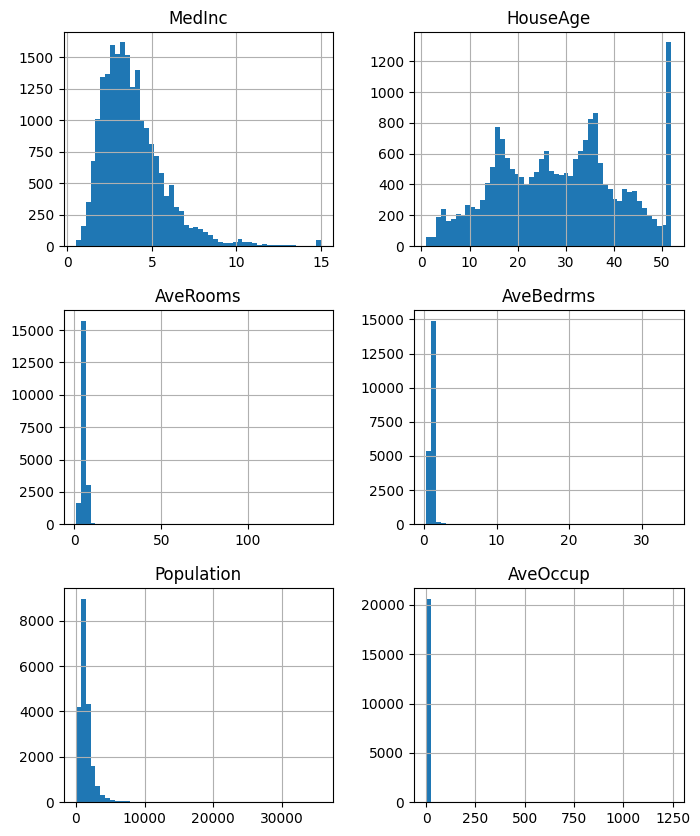

In [3]:
X.hist(bins=50, figsize=(8, 10))
plt.show()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 6), (6192, 6), (14448,), (6192,))

In [5]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [6]:
# train the model
linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)

# train and calculate MSE
print('Train set')
pred = linreg.predict(scaler.transform(X_train))
train_mse = mean_squared_error(y_train, pred)
print(f'Linear Regression mse: {train_mse:.4f}')

# test and calculate MSE
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
test_mse = mean_squared_error(y_test, pred)
print(f'Linear Regression mse: {test_mse:.4f}')

Train set
Linear Regression mse: 0.5988
Test set
Linear Regression mse: 0.6525


## Residuals

Residuals are the difference between the observed value and the predicted value.

In [7]:
# calculate the residuals.

error = y_test - pred

## Residuals distribution

<AxesSubplot: xlabel='MedHouseVal', ylabel='Count'>

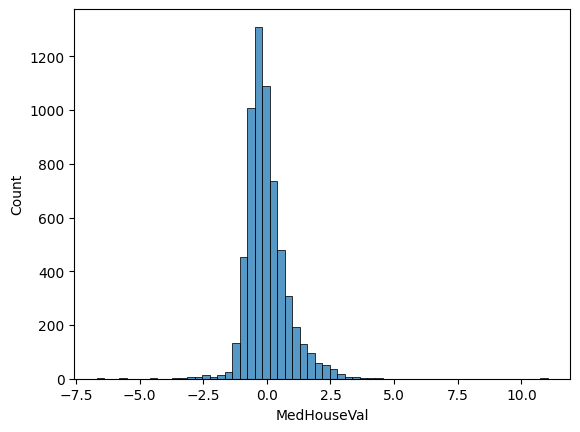

In [8]:
# normally distributed with mean value at 0.

sns.histplot(error, bins=60)

The residuals are centered at 0, and show a fairly normal distribution by visual inspection. 

There is some skew towards the left, with a few higher values towards the right of the distribution.

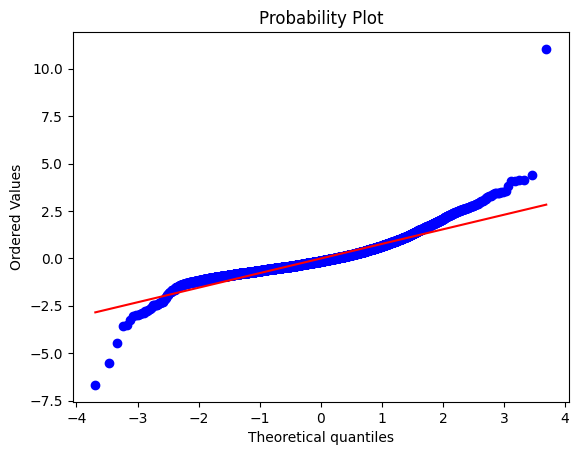

In [9]:
# Q-Q plots

stats.probplot(error, dist="norm", plot=plt)
plt.show()

From the Q-Q plot, we see that the residuals deviate from the red line towards the tails of the distribution; thus, they are not normally distributed.

## Homoscedasticity

Homoscedasticity implies that the variance of the residual terms should be constant at each level of the predictor variable(s). So we need to plot the residuals against the variables.

Homoscedasticity, also known as homogeneity of variance, describes a situation in which the error term (that is, the "noise" in the relationship between the independent variables and the target) is the same across all values of the independent variables.

The way to identify if the variables are homoscedastic, is to make a linear model with all the independent variables involved, calculate the residuals, and plot the residuals vs. each of the independent variables. If the distribution of the residuals is homogeneous across the variable values, then the variables are homoscedastic.

There are other tests for homoscedasticity:

- Residuals plot

- Levene’s test

- Barlett’s test

- Goldfeld-Quandt Test

In [10]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup'],
      dtype='object')

Text(0, 0.5, 'Residuals')

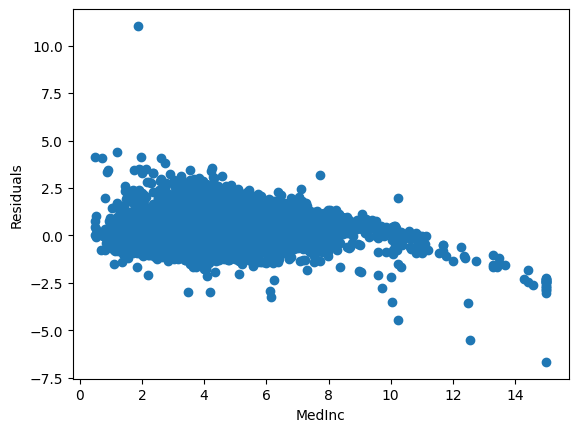

In [11]:
plt.scatter(x=X_test['MedInc'], y=error)
plt.xlabel('MedInc')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

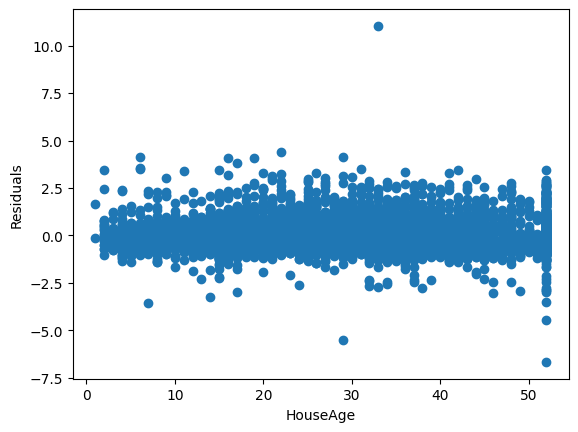

In [12]:
plt.scatter(x=X_test['HouseAge'], y=error)
plt.xlabel('HouseAge')
plt.ylabel('Residuals')

Here, the residuals show homocedasticity.

## Residual analysis with Yellowbrick

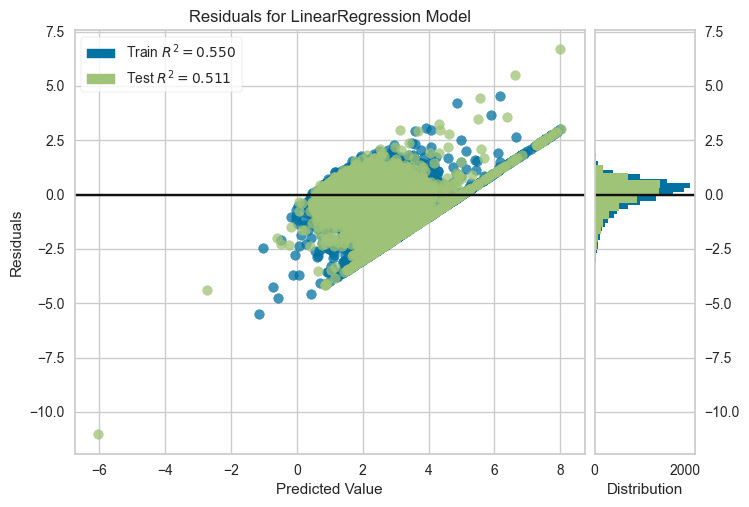

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [13]:
# Yellowbrick allows you to visualise the residuals of the
# models after fitting a linear regression.

from yellowbrick.regressor import ResidualsPlot

linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)
visualizer = ResidualsPlot(linreg)

visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

On the left, we see the residuals vs. the predictions. This plot helps us understand if the residuals are homocedastic against the predictions.

On the right, we see the distribution of the residuals in the train and test sets. The residuals are not centered at 0, and the distributions are slightly skewed.

## Improving model fit

We will use various variance stabilizing transformations to improve value spread (more on this in a later section).

In [14]:
# apply the box-cox transfoPopulationation to the variables.

X['MedInc'] = np.log(X['MedInc'])
X["AveRooms"] = 1 / X["AveRooms"]
X["AveBedrms"] = 1 / X["AveBedrms"]
X["AveOccup"] = 1 / X["AveOccup"]
X['Population'] = np.log(X['Population'])

# Let's separate the data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 6), (6192, 6), (14448,), (6192,))

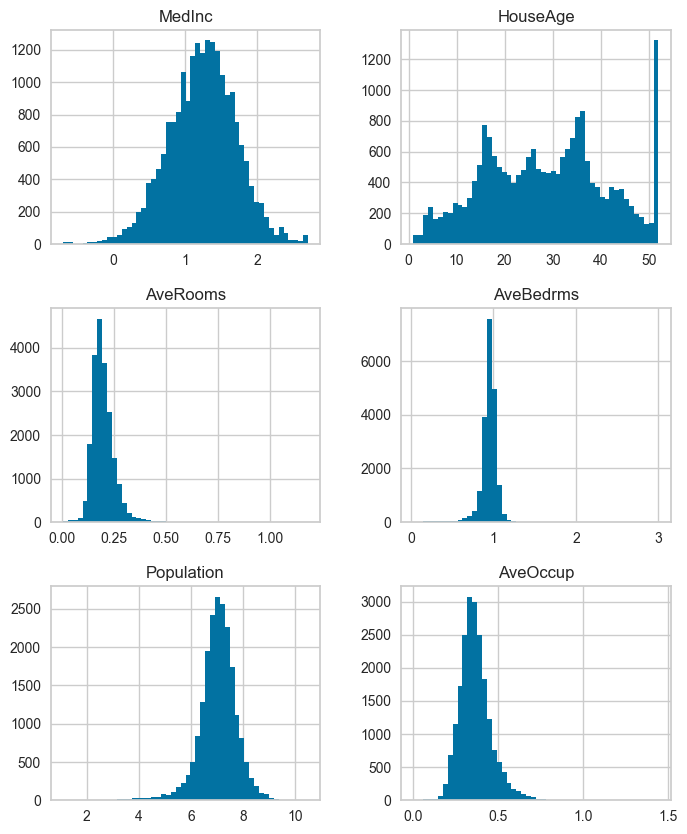

In [15]:
X.hist(bins=50, figsize=(8,10))
plt.show()

In [16]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [17]:
# The model.
linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)

print('Train set')
pred = linreg.predict(scaler.transform(X_train))
train_mse = mean_squared_error(y_train, pred)
print(f'Linear Regression mse: {train_mse:.4f}')

# Make predictions and calculate the mean squared
# error over the test set.
print('Test set')
pred = linreg.predict(scaler.transform(X_test))
test_mse = mean_squared_error(y_test, pred)
print(f'Linear Regression mse: {test_mse:.4f}')

Train set
Linear Regression mse: 0.5827
Test set
Linear Regression mse: 0.5886


## Residuals

<AxesSubplot: xlabel='MedHouseVal', ylabel='Count'>

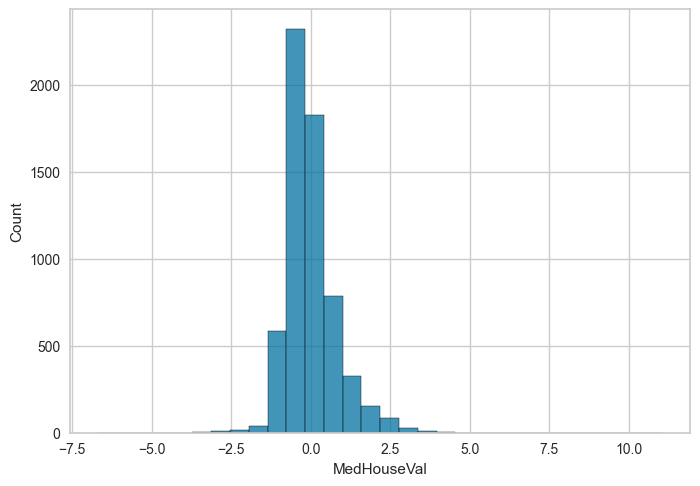

In [18]:
sns.histplot(error, bins=30)

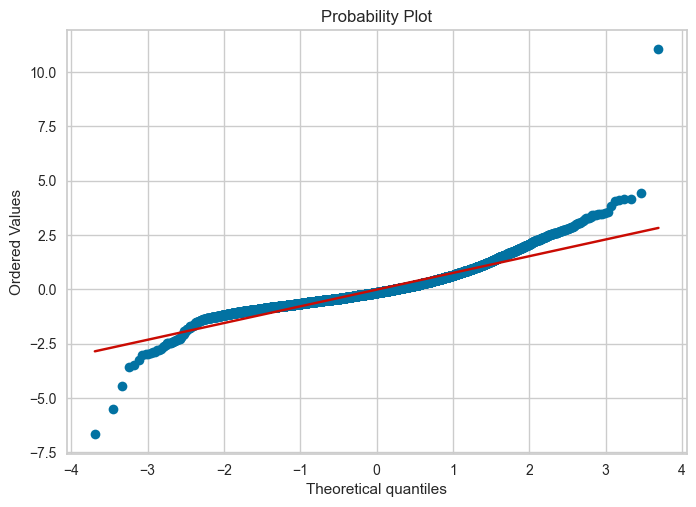

In [19]:
stats.probplot(error, dist="norm", plot=plt)
plt.show()

## Yellowbrick

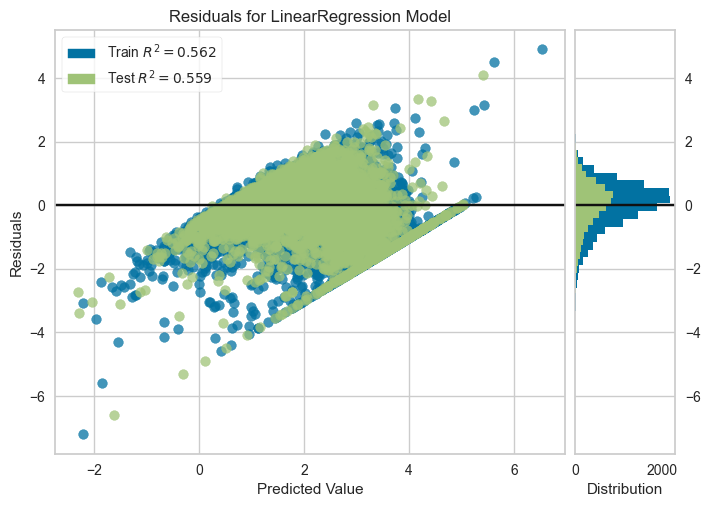

<AxesSubplot: title={'center': 'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [25]:
# train the model
linreg = LinearRegression()
linreg.fit(scaler.transform(X_train), y_train)

# train and calculate MSE
pred = linreg.predict(scaler.transform(X_test))

visualizer = ResidualsPlot(linreg)
visualizer.fit(scaler.transform(X_train), y_train)  # Fit the training data to the model
visualizer.score(scaler.transform(X_test), y_test)  # Evaluate the model on the test data
visualizer.poof()

## Residuals

In [27]:
X_train.columns

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup'],
      dtype='object')

In [28]:
error = y_test - pred

Text(0, 0.5, 'Residuals')

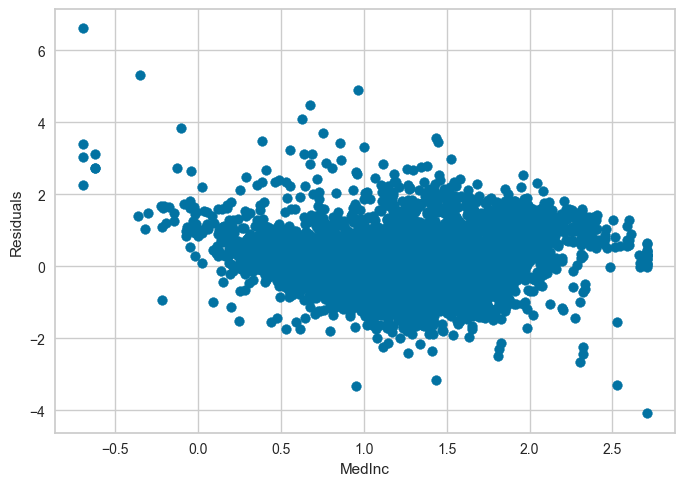

In [29]:
plt.scatter(x=X_test['MedInc'], y=error)
plt.xlabel('MedInc')
plt.ylabel('Residuals')

Text(0, 0.5, 'Residuals')

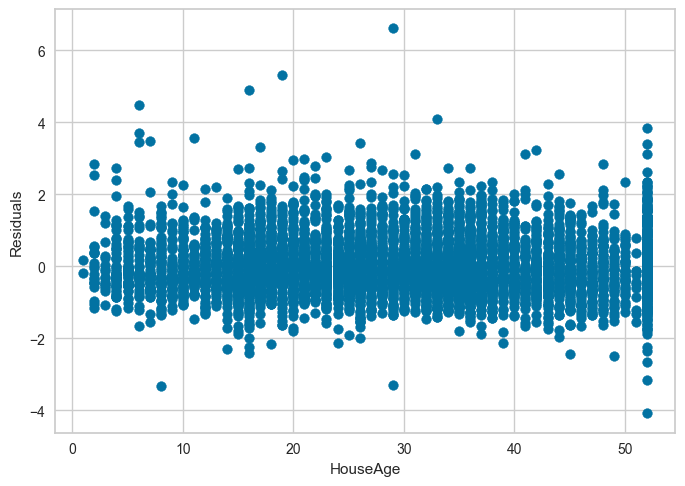

In [30]:
plt.scatter(x=X_test['HouseAge'], y=error)
plt.xlabel('HouseAge')
plt.ylabel('Residuals')